In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.integrate as spint
import scipy.interpolate as spinterp
import lmfit
from lmfit import Minimizer, Parameters, report_fit
import emcee
import corner
import scipy as sp
from multiprocess import Pool
'''Karan Kumar 14906619'''
G = 6.67*(10**-11)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')
dr3stars.info()
#print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   


In [3]:
test = stars[stars['Name'] == 'HSC_38']
test

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
271954,HSC_38,1835,4063634658072393984,0,1.000000,269.480534,0.070968,-26.907709,0.059625,3.131261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
271955,HSC_38,1835,4063634658085846656,0,0.943917,269.483533,0.068428,-26.899140,0.058114,3.140022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
271956,HSC_38,1835,4063634726805334656,1,0.934357,269.446852,0.086676,-26.917035,0.071000,3.108160,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
271957,HSC_38,1835,4063634829884563968,0,0.992583,269.458755,0.065672,-26.893702,0.053637,3.133681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
271958,HSC_38,1835,4063634898590736128,0,0.986327,269.476743,0.370175,-26.878863,0.281034,3.154558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272528,HSC_38,1835,4063626544824264448,1,0.931052,269.307878,0.036860,-27.036679,0.029980,2.942546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
272529,HSC_38,1835,4063626514826891264,1,1.000000,269.325307,0.043212,-27.028509,0.035317,2.957399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
272530,HSC_38,1835,4063626922784970624,1,0.954819,269.287494,0.144384,-27.022264,0.119553,2.945922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
272531,HSC_38,1835,4063626927143789952,1,0.943698,269.282580,0.121411,-27.031187,0.099390,2.936004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0


In [4]:
my_clusters = ['HSC_38', 'Tombaugh_1', 'Gaia_1'] #my assigned clusters

assigned_df = stars[stars['Name'].isin(my_clusters)].copy()

In [5]:
assigned_df['Name'].unique() # i guess it finds the clusters alphabetically
#here im just playing with pandas
HSC_38 = stars[stars["Name"].isin(["HSC_38"])].copy()
Tombaugh_1 = stars[stars["Name"].isin(["Tombaugh_1"])].copy()
Gaia_1= stars[stars["Name"].isin(["Gaia_1"])].copy()

# Q1
## Method
evalute the Mean in RA and DE for one cluster <br>
calculate the radial seperation of a given cluster <br>
create a radial seperation column and return the file as a dataframe <br>

## Assumptions
N/A

In [6]:
def radial(df_cluster):
    '''I copied alot of what i did in my assignment 2 per_cluster() function for this
    Calculate the radial seperation between a star and it's cluster postions in RA and DEC
    Calculate the radial seperation between a star and mean position of a cluster
    
    input-
    df_cluster- dataframe of the cluster you want to analyze
    variables:
    radial- the radial speration, as a magnitude'''
    #calculate the means in this order of one cluster
    clusters = df_cluster.copy()
    RA_mean = clusters['RAdeg'].mean()
    DE_mean = clusters['DEdeg'].mean()
    #calculate the radial seperation
    radial = 3600*np.sqrt((np.power(clusters['RAdeg'] - RA_mean,2) + np.power(clusters['DEdeg'] - DE_mean,2)))

    clusters['Radial'] = radial
    return clusters
Gaia_1 =  radial(Gaia_1)
HSC_38  = radial(HSC_38)
Tombaugh_1 = radial(Tombaugh_1)


# Density Profile
## Method
Bin the radial data <br>
Calculate the area of each bin as an annulus where the radii are the bins <br>
normalize the histrogram by the area, the density is this normalized histogram <br>
## Assumptions
Were counting bins $N$ so the error is given by $\sqrt N$ normalized by the area <br>


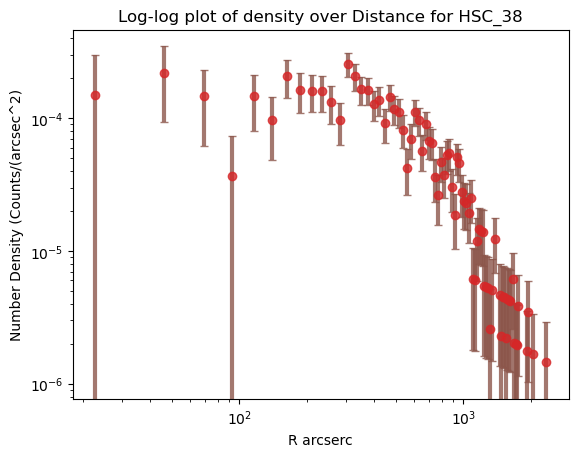

In [7]:
def density_profile(df_cluster,bin_num,color):
    '''This follows my solution from the programming for astronomy course
    compute the area of an annulus using bin edeges as the radius
    return area: the area of each bin'''
    #for plotting
    cluster_name = df_cluster['Name'].unique()[0]
    r_centriod = df_cluster['Radial']
    #r_histo counts of stars in a bin 
    #r_bins number of bins
    r_histo, r_bins = np.histogram(r_centriod,bins=bin_num)
    #r_err, r_err_bins = np.histogram(df_cluster['Radial_err'], bins=bin_num)
    N = len(r_bins)
    bin_area = []
    for i in range(N-1):
        a  = 2*np.pi*(r_bins[i+1]**2 - r_bins[i]**2) # area of annulus
        bin_area.append(a)
    #go around the center of the bin or center of annalus
    r_bin_center = (r_bins[:-1] + r_bins[1:]) / 2
    #number of stars per bin
    rho = r_histo/bin_area
    #sqrt rule
    rho_err = np.sqrt(r_histo)/bin_area
    plt.errorbar(r_bin_center, rho, yerr=rho_err,color=color,ecolor='tab:brown',fmt='o',elinewidth=3,capsize=3,alpha=0.8)
    plt.xlabel('R arcserc')
    plt.ylabel('Number Density (Counts/(arcsec^2)')
    plt.xscale('log')
    plt.title('Log-log plot of density over Distance for '+ cluster_name)
    plt.yscale('log')
    plt.show()
    return r_bin_center, rho, rho_err
plot_HSC = density_profile(HSC_38,100,'tab:red') 

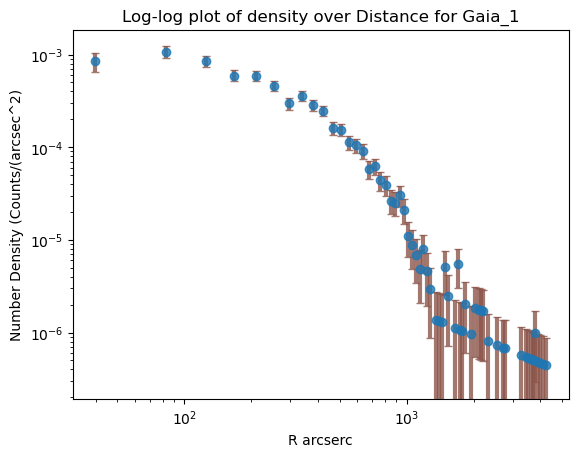

In [8]:
plot_Gaia = density_profile(Gaia_1, 100,'tab:blue')

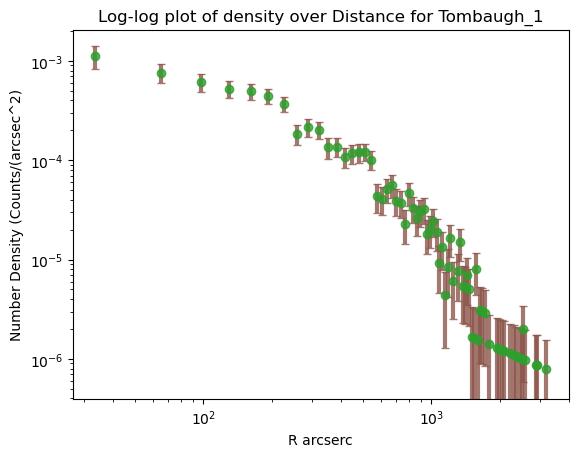

In [9]:
plot_Tombaugh = density_profile(Tombaugh_1, 100,'tab:green')

# Q2
## Method
Define the king model in terms of a parameters object <br>
Replace any large distances with a constant <br>
return the king model as an numpy array
-
## Assumptions 
The input data r_val has no NaN values or values less that zero
---

In [10]:
params = Parameters()  # Assigns a variable name to an empty Parameters object
params.add_many(('rho',10),('rc',30),('rt',130),('C',150))  # Adds multiple parameters, specifying the name and starting value
x = params.valuesdict()

In [11]:
def king_model(r_val,params):
    '''Create a king model 
    input:
    r_val - array of positions
    params- Paramaters() object with added guesses for king model parameters
    variables:
    frac1 , frac2 - fractions in the king model  formula
    x - convert the params values into a dictionary
    king- array of calculated model 
    
    return: 
    king'''
    #initalize y as an array
    #create a parameter dictionary
    x = params.valuesdict()

    frac1 = 1/np.sqrt(1 + (r_val/x['rc']))**2
    frac2 = 1/np.sqrt(1 + (x['rt']/x['rc']))**2
    frac = frac1 - frac2
    king =  x['rho']*frac + x['C']
    #make it a numpy array for convenience
    king = np.array(king)
    #adjust values for king model greater than rt
    king[r_val > x['rt']] = x['C']
    return king


# This is copied directly from Phils Episode 9

In [12]:

def lmf_lsq_resid(params,xdata,ydata,yerrs,model,output_resid=True):
    '''lmfit objective function to calculate and return residual array or model y-values.
        Inputs: params - name of lmfit Parameters object set up for the fit.
                xdata, ydata, yerrs - lists of 1-D arrays of x and y data and y-errors to be fitted.
                    E.g. for 2 data sets to be fitted simultaneously:
                        xdata = [x1,x2], ydata = [y1,y2], yerrs = [err1,err2], where x1, y1, err1
                        and x2, y2, err2 are the 'data', sets of 1-d arrays of length n1, n2 respectively, 
                        where n1 does not need to equal n2.
                    Note that a single data set should also be given via a list, i.e. xdata = [x1],...
                model - the name of the model function to be used (must take params as its input params and
                        return the model y-value array for a given x-value array).
                output_resid - Boolean set to True if the lmfit objective function (residuals) is
                        required output, otherwise a list of model y-value arrays (corresponding to the 
                        input x-data list) is returned.
        Output: if output_resid==True, returns a residual array of (y_i-y_model(x_i))/yerr_i which is
            concatenated into a single array for all input data errors (i.e. length is n1+n2 in 
            the example above). If output_resid==False, returns a list of y-model arrays (one per input x-array)'''
    if output_resid == True:
        for i, xvals in enumerate(xdata):  # loop through each input dataset and record residual array
            if i == 0:
                resid = (ydata[i]-model(xdata[i],params))/yerrs[i]
            else:
                resid = np.append(resid,(ydata[i]-model(xdata[i],params))/yerrs[i])
        return resid
    else:
        ymodel = []
        for i, xvals in enumerate(xdata): # record list of model y-value arrays, one per input dataset
            ymodel.append(model(xdata[i],params))
        return ymodel


In [13]:
def model_bin(xbins, model, params):
    '''General function for integrating the input model over bins defined by contiguous (no gaps) 
        bin edges, xbins.
       Inputs:
           xbins - x bin edges.
           model, params - the model name and associated Parameters object.
       Outputs:
           ymod - calculated counts-density model values for y-axis.'''
    i = 0
    ymod = np.zeros(len(xbins)-1)
    for i, xval in enumerate(xbins[:-1]):
        ymod[i], ymoderr = spint.quad(lambda x: model(x, params),xbins[i],xbins[i+1])
        ymod[i] = ymod[i]/(xbins[i+1]-xbins[i])  # we now divide by the bin width to match the counts density
        # units of our data
    return ymod

def lmf_lsq_binresid(params,xdata,ydata,yerrs,model,output_resid=True):
    '''lmfit objective function to calculate and return residual array or model y-values for
        binned data where the xdata are the input bin edges and ydata are the densities (integral over bin
        divided by bin width).
        Inputs: params - name of lmfit Parameters object set up for the fit.
                xdata, ydata, yerrs - lists of 1-D arrays of x (must be bin edges not bin centres) 
                and y data and y-errors to be fitted.
                    E.g. for 2 data sets to be fitted simultaneously:
                        xdata = [x1,x2], ydata = [y1,y2], yerrs = [err1,err2], where x1, y1, err1
                        and x2, y2, err2 are the 'data', sets of 1-d arrays of length n1 (n1+1 for x2
                        since it is bin edges), n2 (n2+1 for x2) respectively, 
                        where n1 does not need to equal n2.
                    Note that a single data set should also be given via a list, i.e. xdata = [x1],...
                model - the name of the model function to be used (must take params as its input params and
                        return the model y-value array for a given x-value array).
                output_resid - Boolean set to True if the lmfit objective function (residuals) is
                        required output, otherwise a list of model y-value arrays (corresponding to the 
                        input x-data list) is returned.
        Output: if output_resid==True, returns a residual array of (y_i-y_model(x_i))/yerr_i which is
            concatenated into a single array for all input data errors (i.e. length is n1+n2 in 
            the example above). If output_resid==False, returns a list of y-model arrays (one per input x-array)'''
    if output_resid == True:
        for i, xvals in enumerate(xdata):  # loop through each input dataset and record residual array
            if i == 0:
                resid = (ydata[i]-model_bin(xdata[i],model,params))/yerrs[i]
            else:
                resid = np.append(resid,(ydata[i]-model_bin(xdata[i],model,params))/yerrs[i])
        return resid
    else:
        ymodel = []
        for i, xvals in enumerate(xdata): # record list of model y-value arrays, one per input dataset
            ymodel.append(model_bin(xdata[i],model,params))
        return ymodel

In [14]:
def grid1d_chisqmin(a_name,a_range,a_steps,parm,model,xdata,ydata,yerrs):
    '''Uses lmfit. Finds best the fit and then carries out chisq minimisation for a 1D grid of fixed 
       parameters.
       Input: 
            a_name - string, name of 'a' parameter (in input Parameters object parm) to use for grid.
            a_range, a_steps - range (tuple or list) and number of steps for grid.
            parm - lmfit Parameters object for model to be fitted.
            model - name of model function to be fitted.
            xdata, ydata, yerrs - lists of data x, y and y-error arrays (as for the lmf_lsq_resid function)
        Output: 
            a_best - best-fitting value for 'a'
            minchisq - minimum chi-squared (for a_best)
            a_grid - grid of 'a' values used to obtain fits
            chisq_grid - grid of chi-squared values corresponding to a_grid'''
    a_grid = np.linspace(a_range[0],a_range[1],a_steps)
    chisq_grid = np.zeros(len(a_grid))
    # First obtain best-fitting value for 'a' and corresponding chi-squared
    set_function = Minimizer(lmf_lsq_resid, parm, fcn_args=(xdata, ydata, yerrs, model, True),
                             nan_policy='omit')
    result = set_function.minimize(method = 'leastsq')
    minchisq = result.chisqr
    a_best = result.params.valuesdict()[a_name]
    # Now fit for each 'a' in the grid, to do so we use the .add() method for the Parameters object
    # to replace the value of a_name with the value for the grid, setting vary=False to freeze it
    # so it cannot vary in the fit (only the other parameters will be left to vary)
    for i, a_val in enumerate(a_grid):
        parm.add(a_name,value=a_val,vary=False)
        set_function = Minimizer(lmf_lsq_resid, parm, fcn_args=(xdata, ydata, yerrs, model, True), 
                                                                nan_policy='omit')
        result = set_function.minimize(method = 'leastsq')
        chisq_grid[i] = result.chisqr
    return a_best, minchisq, a_grid, chisq_grid 

def calc_error_chisq(delchisq,a_best,minchisq,a_grid,chisq_grid):
    '''Function to return upper and lower values of a parameter 'a' for a given delta-chi-squared
       Input:
           delchisq - the delta-chi-squared for the confidence interval required (e.g. 1 for 1-sigma error)
           a_best, minchisq - best-fitting value for 'a' and corresponding chi-squared minimum
           a_grid, chisq_grid - grid of 'a' and corresponding chi-squared values used for interpolation'''
    # First interpolate over the grid for values > a_best and find upper interval bound
    chisq_interp_upper = spinterp.interp1d(chisq_grid[a_grid > a_best],a_grid[a_grid > a_best])
    a_upper = chisq_interp_upper(minchisq+delchisq)
    # Interpolate for values <= a_best to find lower interval bound
    chisq_interp_lower = spinterp.interp1d(chisq_grid[a_grid <= a_best],a_grid[a_grid <= a_best])
    a_lower = chisq_interp_lower(minchisq+delchisq)  
    return [a_lower,a_upper]

# Q2 Maximum Likelihood estimations
## Method
Bin the data again <br> 
use lmfit to find model parameters for the king model <br>
The x and y are the radial bins and $\rho$ respectively <br>
Minimze the model by leastsq <br>
Plot the data against the model along with residuals <br>
Calculate the confidence intervals seperately  <br>
Find the best fit for the chisquare interval <br>
-
## Assumptions
The minumum guess can be zero because we're calulating physcial parameters <br>
The MLEs are normally distriubted or have large sample size to be able to calculate the upper and lower confidence intervals <br>
-

In [15]:
def make_lmf_stuff(df_cluster,clustername,color,param_guess,delchiflt):
    '''Do lmf stuff
    df_cluster- panada dataframe of cluster to analyze
    clustername- str for plotting cluster name
    color- str for plotting
    param_guess- lst inital parameter guess in order, rho, rc, rt, C guesses should be floats or int
    delchiflt, float of sigma confidence interval- either 1.0, 4.0 or 9.0'''
    #bin the datacluster again
    #this is a copy of my desnity_profile() function
    bin_num = 100
    cluster_dist = df_cluster['Radial']
    r_histo, r_bins = np.histogram(cluster_dist, bins=bin_num)
    r_bin_center = (r_bins[:-1] + r_bins[1:]) / 2
    N = len(r_bins)
    bin_area = []
    for i in range(N-1):
        a  = 2*np.pi*(r_bins[i+1]**2 - r_bins[i]**2) # area of annulus
        bin_area.append(a)
    #number of stars per bin
    rho = r_histo/bin_area
    #check this later- should i have used real data for this
    rho_err = np.sqrt(r_histo)/bin_area
    #min_guess makes sure the array doesnt change size if omitting nan values
    #instead the minimum guess is zero
    min_guess = 0.0
    params = Parameters()  # Assigns a variable name to an empty Parameters object

    #copied from Lmfit github https://lmfit.github.io/lmfit-py/parameters.html
    #we only care about the first four arguements  in  the tuple
    #VARY- lets us change the guess value whiich is what we want
    # add with tuples: (NAME VALUE VARY MIN)
    params.add_many(('rho',param_guess[0] , True, min_guess),
                ('rc', param_guess[1],True,min_guess),
                ('rt', param_guess[2], True,min_guess),
                ('C', param_guess[3],True,min_guess))
    x = params.valuesdict()
    model = king_model
    output_resid = True

    #for some reason this HAS to be a nested list
    xdata = [r_bins]
    xdata_cen = [r_bin_center] # used in chi intervals
    ydata = [rho]
    yerrs = [rho_err]
    set_function = Minimizer(lmf_lsq_binresid, params, fcn_args=(xdata, ydata, yerrs, model, output_resid), nan_policy='omit')
    result = set_function.minimize(method = 'leastsq')
    print("Model fit for " +clustername)
    report_fit(result)
    print("Minimum Chi-squared = "+str(result.chisqr)+" for "+
      str(result.nfree)+" d.o.f.")
    print("The goodness of fit is: ",sps.chi2.sf(result.chisqr,df=result.nfree))
    model_ens = np.linspace(np.min(xdata), np.max(xdata),1000)
    
    # To calculate the best-fitting model values, use the parameters of the best fit output
    # from the fit, result.params and set output_resid=false to output a list of model y-values:
    model_vals = lmf_lsq_resid(result.params,[model_ens],ydata,yerrs,model,output_resid=False)
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.suptitle("Kind Model fit for "+clustername)
    fig.subplots_adjust(hspace=0)
    ax1.scatter(r_bin_center,rho,alpha = 0.5, color=color, label='Data')
    ax1.plot(model_ens, model_vals[0], lw=2,color='tab:purple',label='Model')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax2.errorbar(r_bin_center,
             rho-lmf_lsq_binresid(result.params,xdata,ydata,yerrs,model,output_resid=False)[0],
             yerr=rho_err,marker="o", linestyle="",color=color, ecolor ='tab:brown')

    
    #add labels
    ax1.set_ylabel('Number Density Counts/arcsec^2')
    ax2.set_ylabel("Residuals Counts/arcsec^2")
    ax2.set_xlabel('R arcsec')
    fig.legend()
    plt.savefig(clustername+ "_Kingmodel.png")
    plt.show()
# confidence intervals
 # - ---------------------------------------------------------------------------   
    cluster_name = df_cluster['Name'].unique()[0]
    #coping episode 10 confidence intervals
    model= king_model
    par_names = ['rho','rc','rt', 'C']
    par_ranges= []
    n_steps = 1000
    for i, par_name in enumerate(par_names):
        #min and max best parameters
        par_min = result.params.valuesdict()[par_name] - 6*np.sqrt(result.covar[i,i])
        par_max = result.params.valuesdict()[par_name] + 6*np.sqrt(result.covar[i,i])
        if par_min < 0:
            par_min = 0 
        par_ranges.append([par_min,par_max])
    print("Parameter ranges for grid:",par_ranges)


# For convenience when plotting we will store our results in arrays, which we now set up:
    a_best = np.zeros(len(par_ranges))
    minchisq = np.zeros(len(par_ranges))
    a_grid = np.zeros((len(par_ranges),n_steps))
    chisq_grid = np.zeros((len(par_ranges),n_steps))
    a_int = np.zeros((len(par_ranges),2))
    
    delchisq = delchiflt  # For 1-sigma errors for a single parameter 
    
    #Now do the grid calculation for each parameter:
    for i, par_range in enumerate(par_ranges):
        params2 = Parameters()
        params2.add_many(('rho',param_guess[0] , True, min_guess),
                ('rc', param_guess[1],True,min_guess),
                ('rt', param_guess[2], True,min_guess),
                ('C', param_guess[3],True,min_guess))
        a_best[i], minchisq[i], a_grid[i,:], chisq_grid[i,:] = grid1d_chisqmin(par_names[i],par_range,n_steps,params2,model,
                                 xdata_cen,ydata,yerrs)
        a_int[i,:] = calc_error_chisq(delchisq,a_best[i],minchisq[i],a_grid[i,:],chisq_grid[i,:])
        #Good presentation of results should round off MLE and errors to an appropriate number
        #of decimal places. Here we choose 3 to demonstrate the symmetry of the errors, we 
        #could have used 2 decimal places since that is consistent with the size of the error bars
        print('MLE '+par_names[i]+':',str(np.round(a_best[i],3)),
              'with errors:',str(np.round((a_int[i,:]-a_best[i]),3)))
    
    # Now plot along with a cross to mark the MLE and dotted lines to show the 1-sigma intervals
    par_xlabels = [r'$\rho}$ count/arcsec^2',r'$r_{c}$ arcsec',r'$r_{t}$ (arcsec)','C count/arcsec^2']
    fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize=(9,3), sharey=True)
    fig.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.1, hspace=None)
    for i, ax in enumerate([ax1, ax2, ax3,ax4]):
        ax.plot(a_grid[i,:],chisq_grid[i,:],color=color)
        ax.scatter(a_best[i],minchisq[i],marker='+',color=color)
        ax.vlines(a_int[i,:],ymin=30,ymax=100,color='gray',linestyle='dotted')
        ax.set_xlabel(par_xlabels[i],fontsize=12)
    ax1.set_ylabel(r'$\chi^{2}$',fontsize=12)
    ax1.set_ylim(30,100)
    plt.savefig(clustername+"_confidence.png")
    plt.show()
    return result

Model fit for HSC_38
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 114
    # data points      = 75
    # variables        = 4
    chi-square         = 86.4147141
    reduced chi-square = 1.21710865
    Akaike info crit   = 18.6252388
    Bayesian info crit = 27.8951912
[[Variables]]
    rho:  4.3739e-04 +/- 1.2674e-04 (28.98%) (init = 0.0001)
    rc:   1708.66664 +/- 1204.81077 (70.51%) (init = 100)
    rt:   1231.77753 +/- 36.3037118 (2.95%) (init = 400)
    C:    2.8729e-06 +/- 5.6931e-07 (19.82%) (init = 1e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(rho, rc) = +0.9672
    C(rho, rt) = -0.7241
    C(rc, rt)  = -0.6130
    C(rt, C)   = -0.1912
Minimum Chi-squared = 86.41471412364234 for 71 d.o.f.
The goodness of fit is:  0.10287965810318718


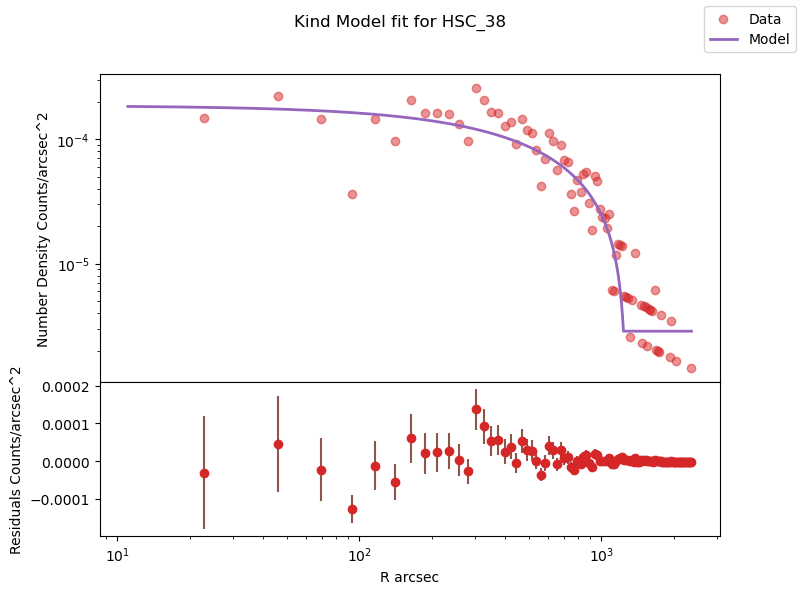

Parameter ranges for grid: [[0, 0.0011978099779145137], [0, 8937.53125156073], [1013.9552572678983, 1449.5997986877348], [0, 6.288781379059313e-06]]
MLE rho: 0.0 with errors: [-0.  0.]
MLE rc: 1734.675 with errors: [-701.888 7032.29 ]
MLE rt: 1230.125 with errors: [-75.51   47.298]
MLE C: 0.0 with errors: [-0.  0.]


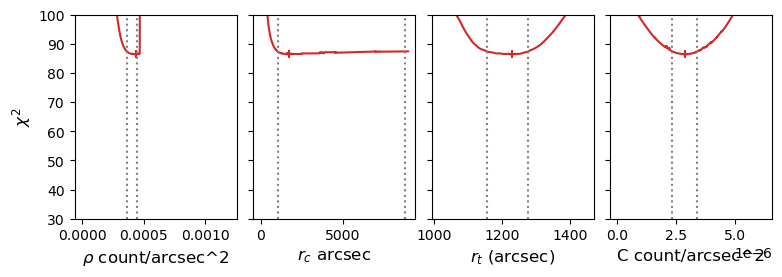

In [50]:
HSC_guess = [1e-4,100,400,1e-5] #old guess before confidience interval [10, 30,130,150]
HSCresult= make_lmf_stuff(HSC_38,"HSC_38",'tab:red',HSC_guess,1.0)

Model fit for GAIA_1
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 150
    # data points      = 60
    # variables        = 4
    chi-square         = 63.3805164
    reduced chi-square = 1.13179494
    Akaike info crit   = 11.2887164
    Bayesian info crit = 19.6660946
[[Variables]]
    rho:  0.00220021 +/- 4.0115e-04 (18.23%) (init = 0.001)
    rc:   80.8050939 +/- 21.2630211 (26.31%) (init = 70)
    rt:   1078.82765 +/- 21.2727006 (1.97%) (init = 100)
    C:    7.5007e-07 +/- 1.3757e-07 (18.34%) (init = 1e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(rho, rc) = -0.9704
    C(rc, rt)  = -0.3924
    C(rho, rt) = +0.2650
Minimum Chi-squared = 63.380516367711024 for 56 d.o.f.
The goodness of fit is:  0.2322981121533345


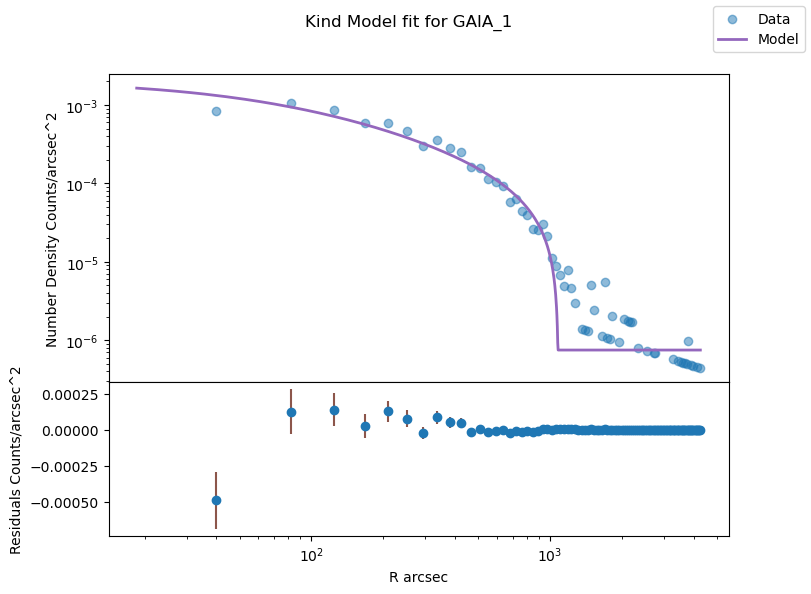

Parameter ranges for grid: [[0, 0.0046071340773348735], [0, 208.38322066723424], [951.191442420374, 1206.463850100539], [0, 1.57550567916977e-06]]
MLE rho: 0.002 with errors: [-0.  0.]
MLE rc: 86.116 with errors: [-29.349  20.742]
MLE rt: 1055.044 with errors: [-20.732  70.255]
MLE C: 0.0 with errors: [-0.  0.]


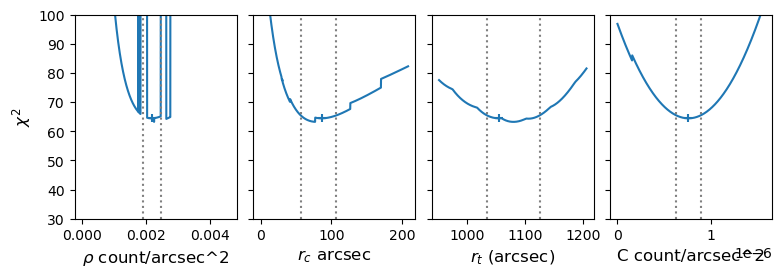

In [17]:
Gaia_guess = [0.001,70,100,1e-05]
Gaia_fit = make_lmf_stuff(Gaia_1, 'GAIA_1','tab:blue',Gaia_guess,1.0)

Model fit for Tombaugh_1
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 158
    # data points      = 67
    # variables        = 4
    chi-square         = 64.6190250
    reduced chi-square = 1.02569881
    Akaike info crit   = 5.57568888
    Bayesian info crit = 14.3944594
[[Variables]]
    rho:  0.00356270 +/- 0.00166219 (46.66%) (init = 1)
    rc:   21.3366735 +/- 11.2073669 (52.53%) (init = 200)
    rt:   1302.62663 +/- 40.3129072 (3.09%) (init = 500)
    C:    1.3858e-06 +/- 2.5480e-07 (18.39%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(rho, rc) = -0.9937
    C(rc, rt)  = -0.3492
    C(rho, rt) = +0.2905
    C(rt, C)   = -0.1522
Minimum Chi-squared = 64.6190249511353 for 63 d.o.f.
The goodness of fit is:  0.41983046714460825


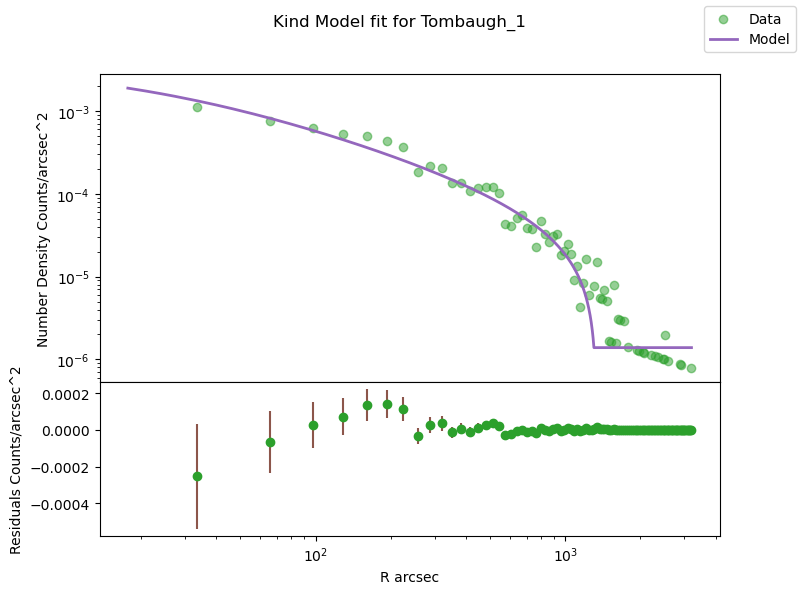

Parameter ranges for grid: [[0, 0.013535844360540257], [0, 88.58087501825071], [1060.7491899991371, 1544.5040763730965], [0, 2.9146311523664886e-06]]
MLE rho: 0.004 with errors: [-0.001  0.   ]
MLE rc: 20.218 with errors: [-9.472 11.564]
MLE rt: 1294.17 with errors: [-36.289 136.928]
MLE C: 0.0 with errors: [-0.  0.]


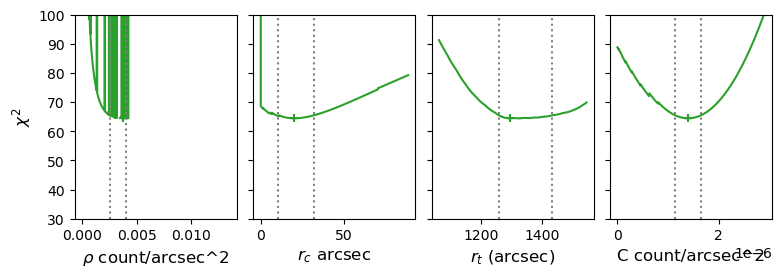

In [48]:
Tombaugh_guess = [1, 200, 500, 1]
Tombaugh_fit = make_lmf_stuff(Tombaugh_1, 'Tombaugh_1','tab:green',Tombaugh_guess,1.0)

# Comments on Q2
Goodness of fits are order 0.1, 0.2 and 0.4 and 71, 56, 63 D.O.F respectivley which are significant at $1\sigma$ this means my fits are poor, this is especially obvious at the tailend of the model. Although two my clusters confidence bounds are closed at $1\sigma$. 
<br> The parabolic distribution is promising since its a reduced $\chi^2$ distriubtion.

The core radius for HSC_38 only has a lower bound at $1\sigma$ which is intersting since the density profile is skewed to the right i would expect an upper bound on the confience interval. <br> But for the other two clusters $r_c$ seems symmetic

$r_{t}$ for all my clusters looks skewed to the left which could be on how i truncate it with C

In [19]:
def another_density_profile(df_cluster,bin_num):
    '''This follows my solution from the programming for astronomy course
    compute the area of an annulus using bin edeges as the radius
    return area: the area of each bin
    same as old one only without plotting
    return the radial bins'''
    #for plotting
    cluster_name = df_cluster['Name'].unique()[0]
    r_centriod = df_cluster['Radial']
    #r_histo counts of stars in a bin 
    #r_bins number of bins
    r_histo, r_bins = np.histogram(r_centriod,bins=bin_num)
    #r_err, r_err_bins = np.histogram(df_cluster['Radial_err'], bins=bin_num)
    N = len(r_bins)
    bin_area = []
    for i in range(N-1):
        a  = 2*np.pi*(r_bins[i+1]**2 - r_bins[i]**2) # area of annulus
        bin_area.append(a)
    #go around the center of the bin or center of annalus
    r_bin_center = (r_bins[:-1] + r_bins[1:]) / 2
    #number of stars per bin
    rho = r_histo/bin_area
    #check this later- should i have used real data for this
    rho_err = np.sqrt(r_histo)/bin_area
    return r_bin_center,rho,rho_err, r_histo


In [20]:
def subsample(df_cluster,percent,splitchoice):
    '''Split a cluster into two subsamples, by Gmag and mean proper motion
    I DONT USE THIS'''
    #columns Gmag and Mean PM, create the Mean PM
    cluster_name = df_cluster['Name'].unique()[0]
    copy_dataframe = df_cluster.copy()
    #calculate the mean PM
    proper_motion_mag = (df_cluster['pmRA'].mean())**2 + (df_cluster['pmDE'].mean())**2
    proper_motion_mag = np.sqrt(proper_motion_mag)
    copy_dataframe["PM" ] = proper_motion_mag

    PM_median = copy_dataframe['PM'].median()
    Gmag_median = copy_dataframe['Gmag'].median()

    PM_below_median = copy_dataframe[copy_dataframe['PM'] <= PM_median]
    PM_after_median = copy_dataframe[copy_dataframe['PM'] >= PM_median]

    G_below_median = copy_dataframe[copy_dataframe['Gmag'] <= Gmag_median]
    G_after_median = copy_dataframe[copy_dataframe['Gmag'] >= Gmag_median]
    bin_num = 20
    # argurements = df_cluster, bin_num, color
    PMbelow_den = another_density_profile(PM_below_median, bin_num)
    PMafter_den = another_density_profile(PM_after_median, bin_num)
    Gbelow_den = another_density_profile(G_below_median, bin_num)
    Gafter_den = another_density_profile(G_after_median, bin_num)
 
    return None
Gaia_samp = subsample(Gaia_1,'25',"Gmag")

In [21]:
def lmf_stuff_again(main_df,sample_df_1,sample_df_2,param_guess,splitchoice):
    ''' Modify the king model to run a fit on three cluster
        main_df, sample_df_1, sample_df_2- panada dataframe of cluster to analyze
    param_guess- lst inital parameter guess in order, rho, rc, rt, C guesses should be floats or int
    splitchoice- str Gmag or PM'''
    cluster_list = [main_df, sample_df_1, sample_df_2]
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    labels = ['Total', '25%','75%']
    clustername = main_df['Name'].unique()[0]
    bin_num = 100
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,6),sharex=True,gridspec_kw={'height_ratios':[2,1]})
    fig.suptitle("Percentile Splitting for "+clustername+" by "+str(splitchoice))
    result_arr = []
    for j, df_cluster in enumerate(cluster_list):
            cluster_dist = df_cluster['Radial']
            r_histo, r_bins = np.histogram(cluster_dist, bins=bin_num)
            r_bin_center = (r_bins[:-1] + r_bins[1:]) / 2
            N = len(r_bins)
            bin_area = []
            for i in range(N-1):
                a  = 2*np.pi*(r_bins[i+1]**2 - r_bins[i]**2) # area of annulus
                bin_area.append(a)
            #number of stars per bin
            rho = r_histo/bin_area
            #check this later- should i have used real data for this
            rho_err = np.sqrt(r_histo)/bin_area
            #min_guess makes sure the array doesnt change size if omitting nan values
            #instead the minimum guess is zero
            min_guess = 0.0
            params = Parameters()  # Assigns a variable name to an empty Parameters object
        
            #copied from Lmfit github https://lmfit.github.io/lmfit-py/parameters.html
            #we only care about the first four arguements  in  the tuple
            #VARY- lets us change the guess value whiich is what we want
            # add with tuples: (NAME VALUE VARY MIN)
            params.add_many(('rho',param_guess[0] , True, min_guess),
                        ('rc', param_guess[1],True,min_guess),
                        ('rt', param_guess[2], True,min_guess),
                        ('C', param_guess[3],True,min_guess))
            x = params.valuesdict()
            model = king_model
            output_resid = True
        
            #for some reason this HAS to be a nested list
            xdata = [r_bins]
            xdata_cen = [r_bin_center] # used in chi intervals
            ydata = [rho]
            yerrs = [rho_err]
            set_function = Minimizer(lmf_lsq_binresid, params, fcn_args=(xdata, ydata, yerrs, model, output_resid), nan_policy='omit')
            result = set_function.minimize(method = 'leastsq')
            result_arr.append(result)

            model_ens = np.linspace(np.min(xdata), np.max(xdata),1000)
            
            # To calculate the best-fitting model values, use the parameters of the best fit output
            # from the fit, result.params and set output_resid=false to output a list of model y-values:
            model_vals = lmf_lsq_resid(result.params,[model_ens],ydata,yerrs,model,output_resid=False)
            ax1.scatter(r_bin_center,rho,alpha = 0.5, color=colors[j], label=labels[j])
            ax1.plot(model_ens, model_vals[0], lw=2,color=colors[j])
            ax1.set_xscale('log')
            ax1.set_yscale('log')
            ax2.errorbar(r_bin_center,
                 rho-lmf_lsq_binresid(result.params,xdata,ydata,yerrs,model,output_resid=False)[0],
                 yerr=rho_err,marker="o", linestyle="",color=colors[j], ecolor ='tab:brown')
    
            
        #add labels
    ax1.set_ylabel('Number Density Counts/arcsec^2')
    ax2.set_ylabel("Residuals Counts/arcsec^2")
    ax2.set_xlabel('R arcsec')
    fig.legend()
    plt.show()
    return result_arr

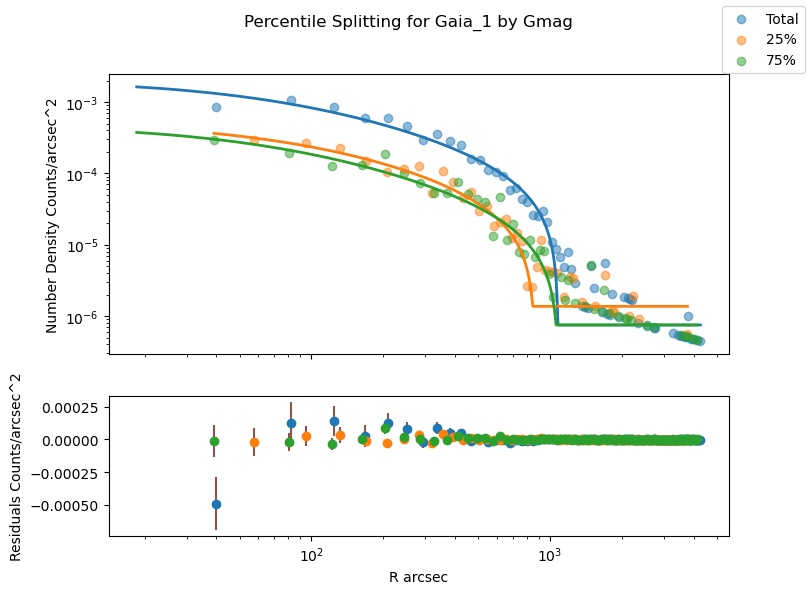

In [22]:

def percents(df_cluster,splitchoice,param_guess):
    '''Split a dataframe into two percetile ranges, compute a subsample density profile
    Splitchoice str- a column in the dataframe in out example Gmag or mean PM'''
    #work with a copy of the dataframe
    #calculate the proper motion
    df_cluster = df_cluster.copy()
    proper_motion_mag = (df_cluster['pmRA'])**2 + (df_cluster['pmDE'])**2
    proper_motion_mag = np.sqrt(proper_motion_mag)
    df_cluster["PM"] = proper_motion_mag

    percentile_range = (25, 75)  # define a percentile range
    #i asked chatgpt for the quantile function
    # Calculate the lower and upper bounds for the percentile range
    per25 = df_cluster[splitchoice].quantile(percentile_range[0] / 100)
    per75= df_cluster[splitchoice].quantile(percentile_range[1] / 100)

    # Filter the DataFrame based on the percentile range
    df25 = df_cluster[df_cluster[splitchoice] <= per25]
    df75 = df_cluster[df_cluster[splitchoice] >= per75]
    #run subsample on both percentile ranges
    samp25 = subsample(df25, '25',splitchoice)
    samp75 = subsample(df75, '75',splitchoice)

    test = lmf_stuff_again(df_cluster, df25, df75, param_guess,splitchoice)
    
    return test
    
Gaia_gmag = percents(Gaia_1,"Gmag", Gaia_guess)
#Gaia_percent_PM = percents(Gaia_1, "PM",Gaia_guess)

In [23]:
def report_percents(report_list,clustername,splitchoice):
    '''Report the results of each sampled cluster'''
    sample = ['total sample','25% percentile', '75% percentile']
    for i, results in enumerate(report_list):
        print(clustername + " best fit for "+sample[i]+" Split by "+splitchoice+" Median")
        print("N = "+str(results.ndata))
        print("Reduced chi ="+str(results.redchi))
        m = results.nfree # degrees of freedom in fit
        print("p-value for our reduced chi-squared: ",sps.chi2.sf(results.redchi,df=m),"for",m,"fewer constraints.")
        display(report_list[i].params)
report_gaia = report_percents(Gaia_gmag, "Gaia_1",'Gmag')

Gaia_1 best fit for total sample Split by Gmag Median
N = 60
Reduced chi =1.1317949351376968
p-value for our reduced chi-squared:  1.0 for 56 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.00220021,4.0115e-04,(18.23%),0.001,0.00000000,inf,True
rc,80.8050939,21.2630211,(26.31%),70,0.00000000,inf,True
rt,1078.82765,21.2727006,(1.97%),100,0.00000000,inf,True
C,7.5007e-07,1.3757e-07,(18.34%),1e-05,0.00000000,inf,True


Gaia_1 best fit for 25% percentile Split by Gmag Median
N = 40
Reduced chi =0.7078348303005575
p-value for our reduced chi-squared:  1.0 for 36 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,5.9136e-04,1.8398e-04,(31.11%),0.001,0.00000000,inf,True
rc,100.645934,52.3686136,(52.03%),70,0.00000000,inf,True
rt,846.681444,26.9989665,(3.19%),100,0.00000000,inf,True
C,1.3678e-06,2.7012e-07,(19.75%),1e-05,0.00000000,inf,True


Gaia_1 best fit for 75% percentile Split by Gmag Median
N = 46
Reduced chi =0.7618219217658951
p-value for our reduced chi-squared:  1.0 for 42 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,5.1061e-04,1.8283e-04,(35.81%),0.001,0.00000000,inf,True
rc,74.4463255,38.0687866,(51.14%),70,0.00000000,inf,True
rt,1059.68587,41.8362888,(3.95%),100,0.00000000,inf,True
C,7.4914e-07,1.5324e-07,(20.46%),1e-05,0.00000000,inf,True


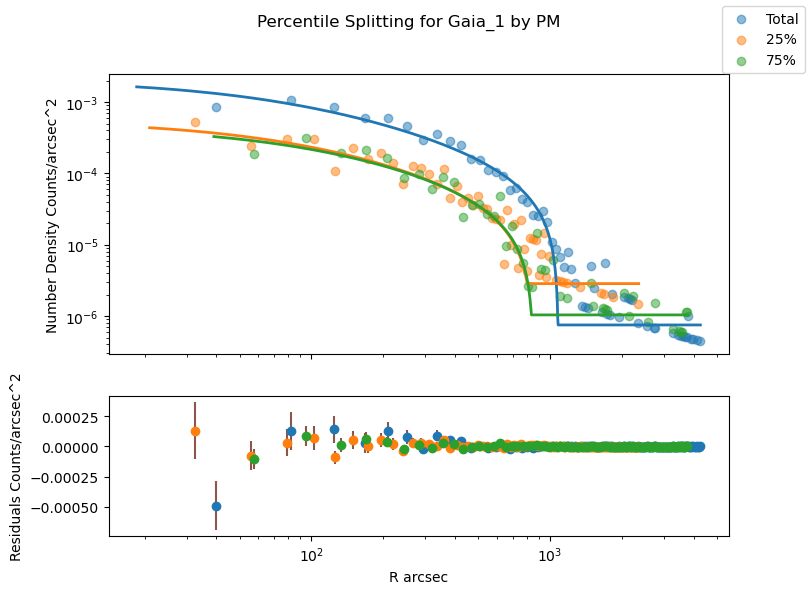

Gaia_1 best fit for total sample Split by PM Median
N = 60
Reduced chi =1.1317949351376968
p-value for our reduced chi-squared:  1.0 for 56 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.00220021,4.0115e-04,(18.23%),0.001,0.00000000,inf,True
rc,80.8050939,21.2630211,(26.31%),70,0.00000000,inf,True
rt,1078.82765,21.2727006,(1.97%),100,0.00000000,inf,True
C,7.5007e-07,1.3757e-07,(18.34%),1e-05,0.00000000,inf,True


Gaia_1 best fit for 25% percentile Split by PM Median
N = 51
Reduced chi =0.7398449078131287
p-value for our reduced chi-squared:  1.0 for 47 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,6.1047e-04,1.9209e-04,(31.47%),0.001,0.00000000,inf,True
rc,92.7162788,50.2217782,(54.17%),70,0.00000000,inf,True
rt,801.838681,37.3150595,(4.65%),100,0.00000000,inf,True
C,2.8506e-06,5.8784e-07,(20.62%),1e-05,0.00000000,inf,True


Gaia_1 best fit for 75% percentile Split by PM Median
N = 44
Reduced chi =0.856485847465905
p-value for our reduced chi-squared:  1.0 for 40 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,5.2490e-04,1.6212e-04,(30.89%),0.001,0.00000000,inf,True
rc,112.741174,61.6387252,(54.67%),70,0.00000000,inf,True
rt,835.006566,29.9639718,(3.59%),100,0.00000000,inf,True
C,1.0377e-06,1.9913e-07,(19.19%),1e-05,0.00000000,inf,True


In [24]:
Gaia_pm = percents(Gaia_1, 'PM', Gaia_guess)
report_pm_gaia = report_percents(Gaia_pm, 'Gaia_1', 'PM')
#here is wrong im taking the exact same samples

# Repeat for the other two clusters

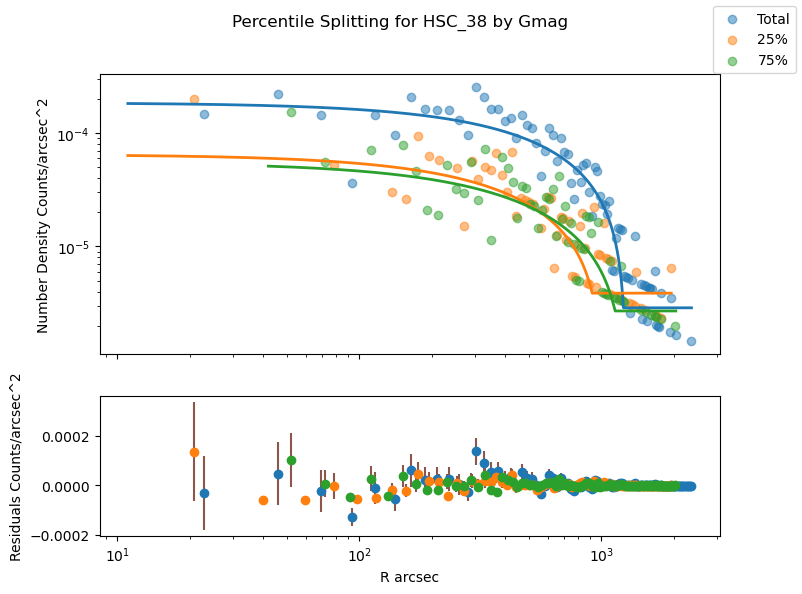

HSC_38 best fit for total sample Split by Gmag Median
N = 75
Reduced chi =1.2171086496287653
p-value for our reduced chi-squared:  1.0 for 71 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,4.3739e-04,1.2674e-04,(28.98%),0.0001,0.00000000,inf,True
rc,1708.66664,1204.81077,(70.51%),100,0.00000000,inf,True
rt,1231.77753,36.3037118,(2.95%),400,0.00000000,inf,True
C,2.8729e-06,5.6931e-07,(19.82%),1e-05,0.00000000,inf,True


HSC_38 best fit for 25% percentile Split by Gmag Median
N = 61
Reduced chi =0.5392327442767048
p-value for our reduced chi-squared:  1.0 for 57 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,1.4093e-04,7.8299e-05,(55.56%),0.0001,0.00000000,inf,True
rc,1197.82368,1728.73117,(144.32%),100,0.00000000,inf,True
rt,915.379987,61.5369735,(6.72%),400,0.00000000,inf,True
C,3.8713e-06,5.6535e-07,(14.60%),1e-05,0.00000000,inf,True


HSC_38 best fit for 75% percentile Split by Gmag Median
N = 60
Reduced chi =0.5129455662048806
p-value for our reduced chi-squared:  1.0 for 56 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,1.0046e-04,2.5793e-05,(25.68%),0.0001,0.00000000,inf,True
rc,1040.66393,1054.91102,(101.37%),100,0.00000000,inf,True
rt,1137.67619,70.7354761,(6.22%),400,0.00000000,inf,True
C,2.6948e-06,5.6544e-07,(20.98%),1e-05,0.00000000,inf,True


In [25]:
# Gaia_pm = percents(Gaia_1, 'PM', Gaia_guess)
# report_pm_gaia = report_percents(Gaia_pm, 'Gaia_1', 'PM')
HSC_gmag = percents(HSC_38, 'Gmag', HSC_guess)
report_gmag_HSC = report_percents(HSC_gmag, "HSC_38", "Gmag")

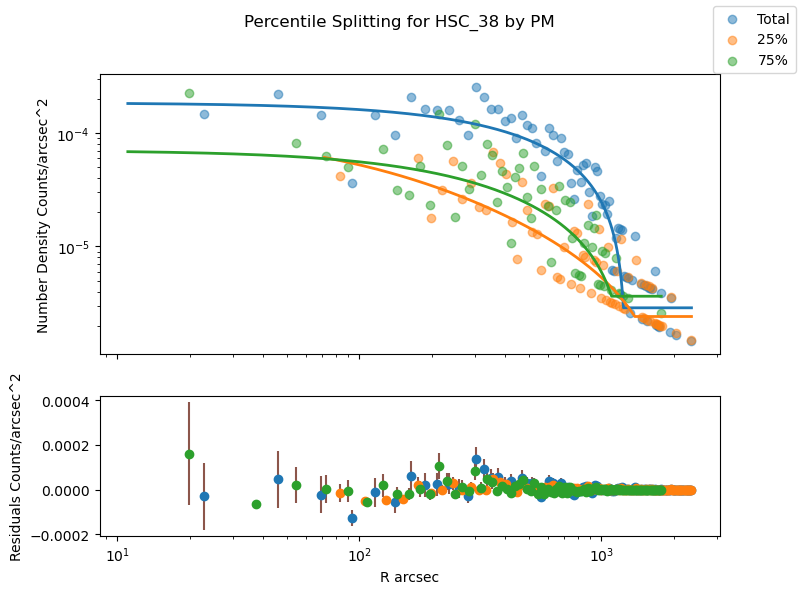

HSC_38 best fit for total sample Split by PM Median
N = 75
Reduced chi =1.2171086496287653
p-value for our reduced chi-squared:  1.0 for 71 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,4.3739e-04,1.2674e-04,(28.98%),0.0001,0.00000000,inf,True
rc,1708.66664,1204.81077,(70.51%),100,0.00000000,inf,True
rt,1231.77753,36.3037118,(2.95%),400,0.00000000,inf,True
C,2.8729e-06,5.6931e-07,(19.82%),1e-05,0.00000000,inf,True


HSC_38 best fit for 25% percentile Split by PM Median
N = 67
Reduced chi =0.5904171644878249
p-value for our reduced chi-squared:  1.0 for 63 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,1.0706e-04,8.3088e-05,(77.61%),0.0001,0.00000000,inf,True
rc,122.584848,147.945750,(120.69%),100,0.00000000,inf,True
rt,1371.01633,180.247636,(13.15%),400,0.00000000,inf,True
C,2.4074e-06,4.0502e-07,(16.82%),1e-05,0.00000000,inf,True


HSC_38 best fit for 75% percentile Split by PM Median
N = 56
Reduced chi =0.7547441016723199
p-value for our reduced chi-squared:  1.0 for 52 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,1.0410e-04,1.5484e-05,(14.87%),0.0001,0.00000000,inf,True
rc,608.429001,630.053941,(103.55%),100,0.00000000,inf,True
rt,1099.81502,108.698163,(9.88%),400,0.00000000,inf,True
C,3.6365e-06,1.2647e-06,(34.78%),1e-05,0.00000000,inf,True


In [26]:
HSC_pm = percents(HSC_38, 'PM', HSC_guess)
report_pm_HSC = report_percents(HSC_pm, "HSC_38", "PM")


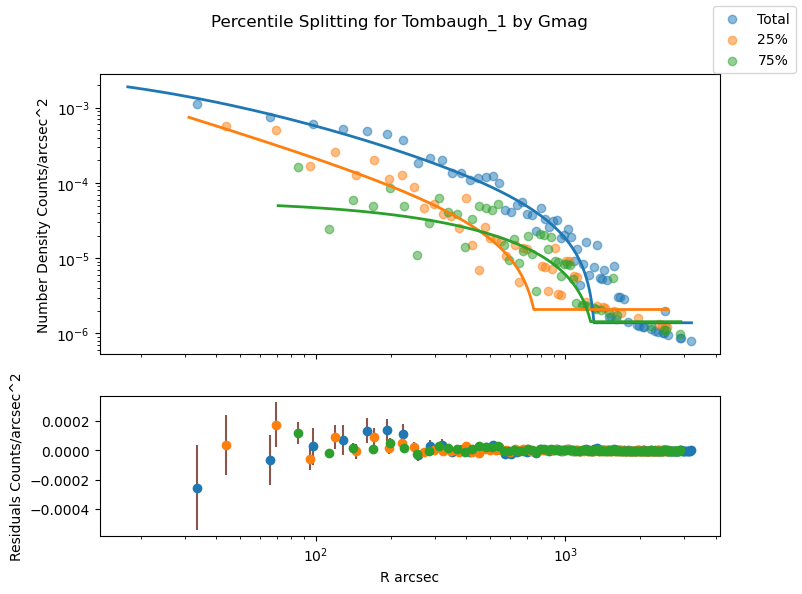

Tombaugh_1 best fit for total sample Split by Gmag Median
N = 67
Reduced chi =1.0256988087481793
p-value for our reduced chi-squared:  1.0 for 63 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.00356270,0.00166219,(46.66%),1,0.00000000,inf,True
rc,21.3366735,11.2073669,(52.53%),200,0.00000000,inf,True
rt,1302.62663,40.3129072,(3.09%),500,0.00000000,inf,True
C,1.3858e-06,2.5480e-07,(18.39%),1,0.00000000,inf,True


Tombaugh_1 best fit for 25% percentile Split by Gmag Median
N = 48
Reduced chi =0.7826459896995052
p-value for our reduced chi-squared:  1.0 for 44 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,29.5744297,602929.889,(2038686.44%),1,0.00000000,inf,True
rc,8.1423e-04,16.6997295,(2050973.10%),200,0.00000000,inf,True
rt,747.810013,67.7041572,(9.05%),500,0.00000000,inf,True
C,2.0805e-06,4.0631e-07,(19.53%),1,0.00000000,inf,True


Tombaugh_1 best fit for 75% percentile Split by Gmag Median
N = 50
Reduced chi =0.9228117953206041
p-value for our reduced chi-squared:  1.0 for 46 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,8.6046e-05,1.1817e-05,(13.73%),1,0.00000000,inf,True
rc,644.543613,627.596572,(97.37%),200,0.00000000,inf,True
rt,1263.11708,93.0037277,(7.36%),500,0.00000000,inf,True
C,1.4323e-06,4.4415e-07,(31.01%),1,0.00000000,inf,True


In [27]:
# HSC_gmag = percents(HSC_38, 'Gmag', HSC_guess)
# report_gmag_HSC = report_percents(HSC_gmag, "HSC_38", "Gmag")
Tombaugh_gmag = percents(Tombaugh_1, 'Gmag', Tombaugh_guess)
report_gmag_Tombaugh =report_percents(Tombaugh_gmag, "Tombaugh_1", "Gmag")



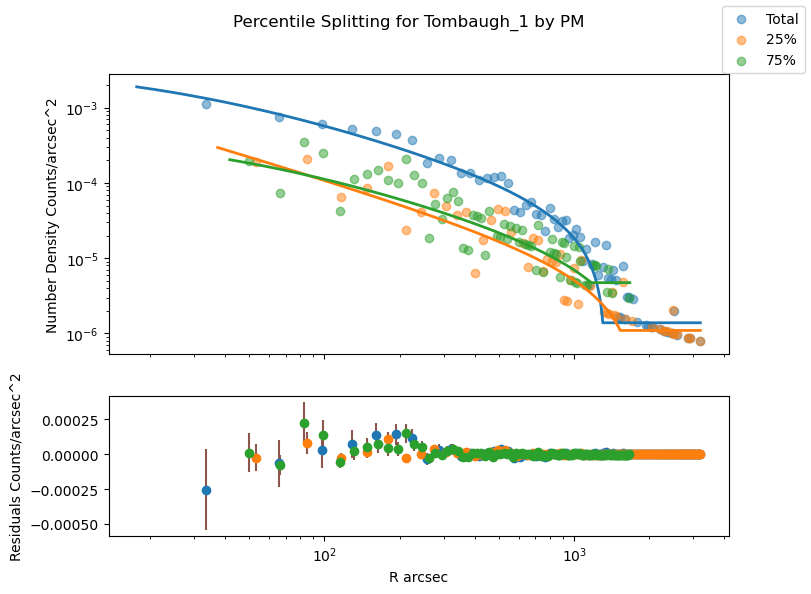

Tombaugh_1 best fit for total sample Split by PM Median
N = 67
Reduced chi =1.0256988087481793
p-value for our reduced chi-squared:  1.0 for 63 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.00356270,0.00166219,(46.66%),1,0.00000000,inf,True
rc,21.3366735,11.2073669,(52.53%),200,0.00000000,inf,True
rt,1302.62663,40.3129072,(3.09%),500,0.00000000,inf,True
C,1.3858e-06,2.5480e-07,(18.39%),1,0.00000000,inf,True


Tombaugh_1 best fit for 25% percentile Split by PM Median
N = 53
Reduced chi =0.8453414415820376
p-value for our reduced chi-squared:  1.0 for 49 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,0.01623934,0.51332906,(3161.02%),1,0.00000000,inf,True
rc,0.70774605,22.5773423,(3190.03%),200,0.00000000,inf,True
rt,1529.57978,149.163524,(9.75%),500,0.00000000,inf,True
C,1.0960e-06,2.6640e-07,(24.31%),1,0.00000000,inf,True


Tombaugh_1 best fit for 75% percentile Split by PM Median
N = 63
Reduced chi =0.68593993456644
p-value for our reduced chi-squared:  1.0 for 59 fewer constraints.


name,value,standard error,relative error,initial value,min,max,vary
rho,4.6555e-04,4.5515e-04,(97.77%),1,0.00000000,inf,True
rc,35.0473358,41.8328962,(119.36%),200,0.00000000,inf,True
rt,1170.73819,175.552910,(15.00%),500,0.00000000,inf,True
C,4.7277e-06,1.2960e-06,(27.41%),1,0.00000000,inf,True


In [28]:
Tombaugh_pm = percents(Tombaugh_1, 'PM', Tombaugh_guess)
report_pm_Tombaugh =report_percents(Tombaugh_pm, "Tombaugh_1", "PM")

# Explaining Q3 
My reduced $\chi^2$ values are promising, since they're all close to unity that means my king model is a good fit for the data. However all my P-values for the chi squared survival function are 1.0. Which means my comparision is wrong. I want to assume Null that my data doesn't fit the model so i can disprove it and accept the Alternative that that the quantiled data decribes the model. But both the quantiled model and the true model explain the fit. And the P values means there is always a better fit the the models. Something is wrong in my comparison

# Q4
## For gaia_1
# Probability Distribution Function and Method
I want to use Bayes' Theorem to calculate the mass of the cluster
$$P(\theta)| D) = \frac{P(D| \theta)P(\theta)}{P(D)} $$
Where $\theta$ are my parameters in the king model $r_{c}, r_{t}, \rho, C, M$ and redefine $r_{c} $ as<br>

$$r_{c} = \frac{2GM}{4.8\cdot10^{-2} \cdot<\sigma^2>\cdot d}$$ in SI units
I assume my priors on $ r_t, \rho, M C$ are uniform and therefore drop out when integrating my prior in distance is my posteroior from assignment 2 ( see function __posterior_on_distance()__ ) My prior on $<\sigma^2>$ comes from the mean and standard deviation of the standard deviation in proper motion. I also assume each prior is independent from one another

$$\sigma^2_{pm} = \sigma^2_{PMRA} + \sigma^2_{PMDE}  $$
For each star and the prior comes from the mean and standard deviation of this expression __std_pm_cluster()__ and __prior_on_PM()__ This way of summing square random varaites. should approach a normal distribution and CLT holds.

My likelehood is a newly defined king model where i use my redefined $r_c$ see function __new_king_model()__ I pass my posteriors and priors on d and $\sigma^2$ into the MCMC
## Method
calculate the Posterior on the Distance to the cluster, use this as a prior on $r_{c}$ <br>
I used the posterior we made in assignment 2, modified it to accept Gaia_1 and thanks to Niek for the code corrections <br>

In [29]:
def realitstic_prior(d):
    '''Calculate an exponetial prior for distance'''
    L = 1.0
    return (d**2)*np.exp(-d/L)

910
5.02712602525326


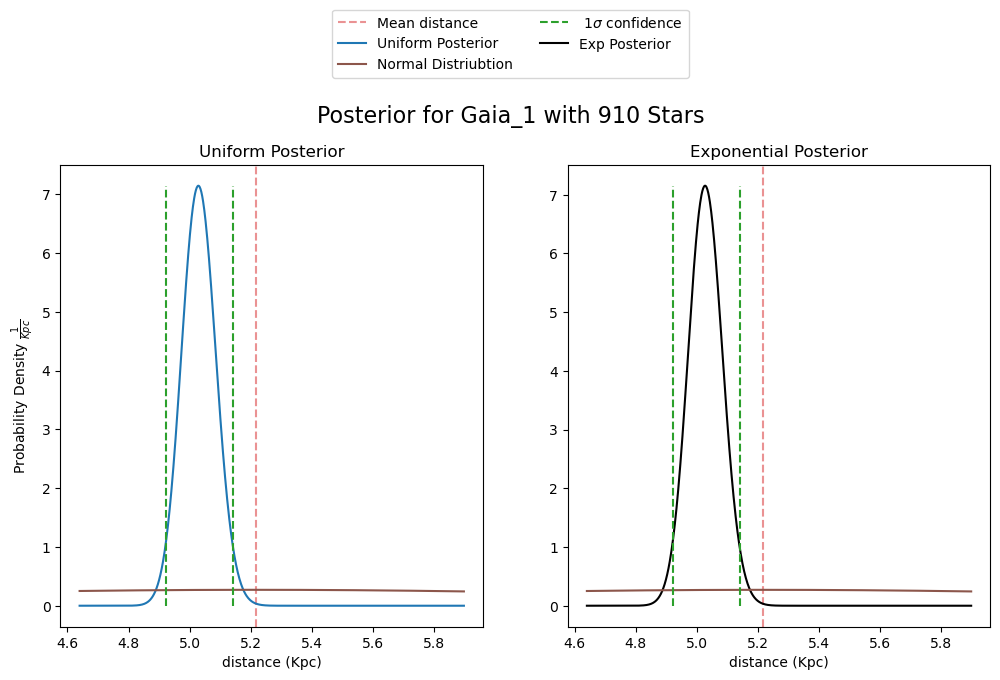

My cluster is Gaia_1
The Integrated posterior for a Normal Prior is 1.0 And for the Exponetial Prior is 1.0000000000000004
Mode of Posterior pdf 5.02712602525326 Kpc
95% confidence interval for uniform prior = [4.92249206 5.14156851] Kpc
95% confidence interval for exponetial prior = [4.92074948 5.13954855] Kpc


In [30]:
def posterior_on_distance(clusters, stars,cluster_name,samp, plotting, results):
    '''Calculate the posterior for distance to a cluster
    In log space
    From a random filtered cluster, sample its distance, mean and std dev
    use  Bayes' theorem to see if the data follows a gaussian

    The distance needs to be converted from parallax

    input: 
    cluster: pd dataframe of star clusters with more than 200 stars and low standard deviation
    star: pdf dataframe of the raw data
    
    Cluster_name - str Name of a cluster from cluster df
    samp- Boolean, if False sample all the stars if True sample 10 stars
    plotting- Boolean if true show the plot otherwise dont
    results - Boolean if true print the needed results otherwise dont

    variables
    dataset- all the data within stars of the randomly selected cluster
    parameters- get all the parameter space of the cluster to calculate the mean and std dev
    distance array - the distrance of the individual stars in the cluster
    possion_array - a sample of the distances 

    Pd_normal- the model evidence for a gaussian likelyhood and uniform prior
    Pd_exp- the model evidnece for a gaussian likelyhood and exponential prior

    return -
    fancy_post- the posterior on the distance using the expoential prior on 
    '''
    #pick a random cluster from the cleaned dataset
    #rng = np.random.default_rng(rng_val) #for reproducability
    random_cluster = cluster_name
    #obtain all the data about the cluster
    #make a copy so that i dont get operation errors
    dataset = stars[stars['Name'] == random_cluster].copy()
    #gather all the parameters in the cluster 
    parameters = dataset.loc
    #add offset to parallax units mas
    offset = 0.029 #mas 
    dataset['Plx'] = (dataset['Plx'] + offset) 
    #create a new column of distance to source
    dataset['Distance'] = 1/dataset['Plx'] # distance to star in kilo parsec
    #calculate the mean and std deviation after the offset
    mean_dist = dataset["Distance"].mean()
    sample_N = len(dataset)
    std_dist = dataset['Distance'].std(numeric_only=True)/np.sqrt(sample_N)
    ## Niek: the error on the mean is the standard deviation / sqrt(N)
    ### corrected now, since its just a sample of the populations

    e_plx = dataset['e_Plx']
    #for the uniform distribution prior
    uniform_distro = mean_dist
    #make sure the distances are an numpy array
    # either sample all the stars or 10 stars
    if samp == False:        
        distance_array = dataset['Distance'].to_numpy()
    elif samp == True:
         distance_array = np.random.choice(dataset['Distance'].to_numpy(),size=10)
    #calculate the normal distribution for a cluster P(D| theta)
    print(len(distance_array))
    #make a possionbda array like that in episode 7 but for distance
    # possion_array = np.linspace(np.max([np.min(distance_array)/2,0.1]), np.max(distance_array)*2, num=1000) 
    ## Niek: I would choose a different name that is more informative, the possionbda refers to a Poisson distribution parameter.
    ### fixed
    std_errdist = np.std(dataset['Plx'])*mean_dist**2/np.sqrt(len(distance_array))
    possion_array = np.linspace(1/np.mean(dataset['Plx'])-7*std_errdist,1/np.mean(dataset['Plx'])+7*std_errdist,len(dataset))
    # possion_array = np.linspace(np.max([1/(np.mean(dataset['Plx'])+15*np.std(dataset['Plx'])),0.02]),
    #                                np.min([np.max((distance_array)*2),10]),1000)
    n_events = dataset["Plx"].to_numpy()
    #make a sample of random distributions around the distance to the cluster
    #loc is the mean and scale is the standard deviation

    #reshape the sample array
    reshape = n_events.reshape(len(n_events),1)
    plx_events = e_plx.to_numpy()
    reshape_eplx = plx_events.reshape(len(plx_events),1)

    #calculate the prior in logspace for each star and sum the total, convert back to normal space
    loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/possion_array, scale=reshape_eplx)),axis=0) + np.log(uniform_distro)
    likel_prior = np.exp(loglikel_prior-np.amax(loglikel_prior))
    #integrate the denominator
    Pd_normal = spint.simpson(likel_prior,x=possion_array)
    #posterior 
    normal_post = (likel_prior)/(Pd_normal)
    
    
    
    #repeat for the exponential prior call it "fancy" to aviod confusion with np.exp
    fancy_prior = realitstic_prior(d=possion_array)
    #copy and pasted the cod eabove and changed the prior
    fancy_loglikel_prior = np.sum((sps.norm.logpdf(reshape, loc=1/possion_array, scale=reshape_eplx)),axis=0) + np.log(fancy_prior)
    fancy_likel_prior = np.exp(fancy_loglikel_prior-np.amax(fancy_loglikel_prior))
    
    Pd_fancy = spint.simpson(fancy_likel_prior,x=possion_array)
    #exponetial distro posterior
    fancy_post = (fancy_likel_prior)/Pd_fancy

    #do a check with a nomral distribution
    #assuming mean and std dev is given by one value
    normal_distribution_cluster = sps.norm.pdf(x=possion_array, loc=mean_dist, scale=std_dist)
    

    #check area under the posterior = 1
    total_norm_post = spint.simpson(normal_post,x =possion_array)
    total_fancy_post = spint.simpson(fancy_post, x=possion_array)
    
    post_result = "The Integrated posterior for a Normal Prior is " +str(total_norm_post) + " And for the Exponetial Prior is "+str(total_fancy_post)
    ## uniform prior,not normal
    
    #find the max posterior position
    #since they overlap i'll use the max of the exponential posterior
    #we also need it for assignment 4
    max_posterior = possion_array[np.argmax(fancy_post)]
    print(max_posterior)


    #confidence interval stuff
    #following phill's notes
    #for the uiform distiibution
    posterior_cdf_normal = spint.cumulative_trapezoid(normal_post,possion_array,initial=0)


    
    #invert the CDF
    # print(posterior_cdf_normal)
    posterior_ppf_normal = spinterp.interp1d(posterior_cdf_normal,possion_array)
    #define the confidence internval 
    int95_normal = posterior_ppf_normal([0.025,0.975])
    
    #Repeat for exponential
    posterior_cdf_fancy = spint.cumulative_trapezoid(fancy_post,possion_array,initial=0)
    #invert the CDF
    posterior_ppf_fancy= spinterp.interp1d(posterior_cdf_fancy,possion_array)
    #define the confidence internval 
    int95_fancy= posterior_ppf_fancy([0.025,0.975])


    #i asked chatgpt for this legend
    #fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
    if plotting: #if true
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        n_stars = len(distance_array) #number of sampled stars
        fig.suptitle('Posterior for '+random_cluster+" with "+str(n_stars)+' Stars', fontsize=16) 
        #mean plot line
        axes[0].axvline(x=mean_dist, alpha=0.5, c='tab:red', linestyle='--', label='Mean distance')
        axes[1].axvline(x=mean_dist, alpha=0.5, c='tab:red', linestyle='--')
        #normal posterior plot
        axes[0].set_title("Uniform Posterior")
        axes[0].plot(possion_array, normal_post,label="Uniform Posterior")
        axes[0].set_ylabel(r"Probability Density $\frac{1}{Kpc}$")
        axes[0].set_xlabel("distance (Kpc)")
        axes[1].set_xlabel("distance (Kpc)")
        #exponetial prior
        axes[1].set_title("Exponential Posterior")
        axes[1].plot(possion_array, fancy_post,color='k',label="Exp Posterior")
        axes[0].plot(possion_array, normal_distribution_cluster,label="Normal Distriubtion",color='tab:brown')
        axes[1].plot(possion_array, normal_distribution_cluster,color='tab:brown')
        
        axes[0].vlines(int95_normal,ymin=0,ymax=np.max(normal_post),color='tab:green',linestyle='dashed', label= r" 1$\sigma$ confidence")
        axes[1].vlines(int95_normal,ymin=0,ymax=np.max(fancy_post),color='tab:green',linestyle='dashed',)
        #i asked chatgpt for the legend
        fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
        plt.show()
    if results: #if true
        print("My cluster is " + random_cluster)
        print(post_result)
        print("Mode of Posterior pdf", max_posterior,"Kpc")
        print(r'95% confidence interval for uniform prior =',int95_normal,"Kpc")
        print(r'95% confidence interval for exponetial prior =',int95_fancy, "Kpc")

    fancy_post = np.array(fancy_post)
    return fancy_post
# post_result = posterior(cluster_analysis, stars,'Bochum_10',samp=False,plotting=True,results=True)
distance_posterior_also_prior = posterior_on_distance(Gaia_1, stars,'Gaia_1',samp=False,plotting=True,results=True)

# Calculate the Standard Deviation on Proper Motion

In [31]:
def std_pm_cluster(df_cluster):
    df_cluster = df_cluster.copy()
    mean_pmra = df_cluster['pmRA'].mean()
    mean_pmde = df_cluster['pmDE'].mean() 
    # do the variance and mean for pmra and pmde for each star by hand
    sample_n = len(df_cluster)
    #calulate the sample variance of pmra and pmdec for each star
    var_ra = (df_cluster['pmRA'] - mean_pmra)**2
    var_de = (df_cluster['pmDE'] - mean_pmde)**2
    var_pm = var_ra + var_de
    df_cluster['PM variance'] = var_pm
    return df_cluster
Gaia_1= std_pm_cluster(Gaia_1)
Gaia_1

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS,Radial,PM variance
176209,Gaia_1,1746,2946301699100767616,1,0.528004,101.494169,0.151185,-16.764214,0.217537,227.361417,...,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,47.000107,0.047581
176210,Gaia_1,1746,2946301630385389952,1,0.773869,101.526641,0.068460,-16.752622,0.099828,227.364563,...,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,93.069071,0.013473
176211,Gaia_1,1746,2946301699104875264,1,0.533054,101.497947,0.045210,-16.765246,0.063336,227.363950,...,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,45.389551,0.098725
176212,Gaia_1,1746,2946301664745138816,1,0.833860,101.490434,0.026731,-16.768334,0.037307,227.363593,...,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,66.726131,0.008273
176213,Gaia_1,1746,2946301729168394752,1,0.642477,101.480309,0.085361,-16.767651,0.115315,227.358699,...,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,90.735771,0.028358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177114,Gaia_1,1746,2947052729969764480,1,0.631055,101.450720,0.091496,-16.711108,0.117323,227.294716,...,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,234.937209,0.017213
177115,Gaia_1,1746,2947052729969766144,1,0.519829,101.456310,0.096531,-16.715530,0.129628,227.301103,...,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,209.287255,0.051242
177116,Gaia_1,1746,2947052734268738816,1,0.542265,101.444492,0.123697,-16.711626,0.159927,227.292559,...,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,251.442314,0.038308
177117,Gaia_1,1746,2947052695610021120,1,0.620933,101.435148,0.070034,-16.728233,0.094047,227.303743,...,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,252.529411,0.028856


In [32]:
def prior_on_pm(df_cluster):
    '''define a prior on proper motionresult.x
    the stanadard error is a sum of squared variates and CLT holds 
    Assume normal distriubtion'''
    df_cluster = df_cluster.copy()
    mean_var = df_cluster['PM variance'].mean()
    std_var = df_cluster['PM variance'].std()
    prior = sps.norm.logpdf(x=df_cluster['PM variance'], loc=mean_var, scale=std_var)
    #convert to np array
    prior = np.array(prior)
    return prior
pm_prior = prior_on_pm(Gaia_1) 

In [33]:
def lmf_poissll(params,xdata,ydata,model,output_ll=True):
    '''lmfit objective function to calculate and return total negative Poisson log-likelihood or model 
        y-values for binned data where the xdata are the contiguous (i.e. no gaps) input bin edges and 
        ydata are the counts (not count densities) per bin.
        Inputs: params - name of lmfit Parameters object set up for the fit.
                xdata, ydata - lists of 1-D arrays of x (must be bin edges not bin centres) 
                and y data and y-errors to be fitted.
                    E.g. for 2 data sets to be fitted simultaneously:
                        xdata = [x1,x2], ydata = [y1,y2], yerrs = [err1,err2], where x1, y1, err1
                        and x2, y2, err2 are the 'data', sets of 1-d arrays of length n1 (n1+1 for x2
                        since it is bin edges), n2 (n2+1 for x2) respectively, 
                        where n1 does not need to equal n2.
                    Note that a single data set should also be given via a list, i.e. xdata = [x1],...
                model - the name of the model function to be used (must take params as its input params and
                        return the model y counts density array for a given x-value array).
                output_resid - Boolean set to True if the lmfit objective function (total -ve 
                        log-likelihood) is required output, otherwise a list of model y-value arrays 
                        (corresponding to the input x-data list) is returned.
        Output: if output_resid==True, returns the total negative log-likelihood. If output_resid==False, 
                returns a list of y-model counts density arrays (one per input x-array)'''
    if output_ll == True:
        poissll = 0
        for i, xvals in enumerate(xdata):  # loop through each input dataset to sum negative log-likelihood
                # We can re-use our model binning function here, but the model then needs to be converted into 
                # counts units from counts density, by multiplying by the bin widths
                ymodel = model_bin(xdata[i],model,params)*np.diff(xdata[i])
                # Then obtain negative Poisson log-likelihood for data (in counts units) vs the model 
                poissll = poissll + LogLikelihood_Pois(ymodel,ydata[i])
        return poissll
    else:
        ymodel = []
        for i, xvals in enumerate(xdata): # record list of model y-value arrays, one per input dataset
            ymodel.append(model_bin(xdata[i],model,params))
        return ymodel


In [40]:
new_params = Parameters()
#mass guess is mass of sun and number of stars in Gaia
new_params.add_many(('rho',10),('M',931),('d',5.02),('std',Gaia_1['PM variance'].mean()),('rt',100),('C',10)) 

In [41]:
best_par_list = []
result = Gaia_fit
for par in ['rho','M','d','std','rt','C']:
    best_par_list.append(new_params[par].value)
best_par=np.array(best_par_list) # needs to be an array so we can use it for calculations
ndim, nwalkers = 6, 100  # The number of parameters and the number of walkers (we follow the 
# emcee example and use 100)
output_ll=True
pos = [best_par + 0.01*best_par*sps.norm.rvs(size=ndim) for i in range(nwalkers)]  # we spread the 
# walkers around the MLEs with a standard deviation equal to 1 per cent of the MLE value

# Redfine the king model so $r_{c}$ is in terms of M, <$\sigma_{pm}^2$> and d

In [42]:
def new_king_model(r_val,params):
    '''Create a king model 
    input:
    r_val - array of positions
    params- Paramaters() object with added guesses for king model parameters
    variables:
    frac1 , frac2 - fractions in the king model  formula
    x - convert the params values into a dictionary
    king- array of calculated model 
    
    return: 
    king'''
    #initalize y as an array
    #create a parameter dictionary
    (rho, mass, dist, std, rt, C) = params
    #G = 6.67*(10**-11)
    #define rc in terms of parameters do conversion LATER
    rc = (G*mass)/(std * dist)
    
    frac1 = 1/np.sqrt(1 + (r_val/rc))**2
    frac2 = 1/np.sqrt(1 + (rt/rc))**2
    frac = frac1 - frac2
    king =  rho*frac + C
    #make it a numpy array for convenience
    king = np.array(king)
    #adjust values for king model greater than rt
    king[r_val > rt] = C
    return king

# Monte Carlo Functions from Episode 12

In [44]:
def lmf_poissll_emcee(params,xdata,ydata,model,prior_model,output_ll=True):
    '''lmfit-style objective function to calculate and return total Poisson log-likelihood or model 
        y-values for binned data where the xdata are the contiguous (i.e. no gaps) input bin edges and 
        ydata are the counts (not count densities) per bin.
        Inputs: params - name of lmfit Parameters object set up for the fit.
                xdata, ydata - lists of 1-D arrays of x (must be bin edges not bin centres) 
                and y data and y-errors to be fitted.
                    E.g. for 2 data sets to be fitted simultaneously:
                        xdata = [x1,x2], ydata = [y1,y2], yerrs = [err1,err2], where x1, y1, err1
                        and x2, y2, err2 are the 'data', sets of 1-d arrays of length n1 (n1+1 for x2
                        since it is bin edges), n2 (n2+1 for x2) respectively, 
                        where n1 does not need to equal n2.
                    Note that a single data set should also be given via a list, i.e. xdata = [x1],...
                model - the name of the model function to be used (must take params as its input params and
                        return the model y counts density array for a given x-value array).
                output_resid - Boolean set to True if the lmfit objective function (total -ve 
                        log-likelihood) is required output, otherwise a list of model y-value arrays 
                        (corresponding to the input x-data list) is returned.
        Output: if output_resid==True, returns the total negative log-likelihood. If output_resid==False, 
                returns a list of y-model counts density arrays (one per input x-array)'''
    if output_ll == True:
        poissll = 0
        for i, xvals in enumerate(xdata):  # loop through each input dataset to sum negative log-likelihood
                # We can re-use our model binning function here, but the model then needs to be converted into 
                # counts units from counts density, by multiplying by the bin widths
                ymodel = model_bin(xdata[i],model,params)*np.diff(xdata[i])
                # Then obtain negative Poisson log-likelihood for data (in counts units) vs the model 
                poissll = poissll + (-1*LogLikelihood_Pois(ymodel,ydata[i]))
        poissll_prior = poissll + prior_model(params)     
        if not np.isfinite(poissll_prior.any()):
            return -np.inf
        else:
            return poissll_prior
    else:
        ymodel = []
        for i, xvals in enumerate(xdata): # record list of model y-value arrays, one per input dataset
            ymodel.append(model_bin(xdata[i],model,params))
        return ymodel

def model_bin(xbins, model, params):
    '''General function for integrating the input model over bins defined by contiguous (no gaps) 
        bin edges, xbins.
       Inputs:
           xbins - x bin edges.
           model, params - the model name and associated Parameters object.
       Outputs:
           ymod - calculated counts-density model values for y-axis.'''
    i = 0
    ymod = np.zeros(len(xbins)-1)
    for i, xval in enumerate(xbins[:-1]):
        ymod[i], ymoderr = spint.quad(lambda x: model(x, params),xbins[i],xbins[i+1])
        ymod[i] = ymod[i]/(xbins[i+1]-xbins[i])  # we now divide by the bin width to match the counts density
        # units of our data
    return ymod

def LogLikelihood_Pois(model_counts, counts): 
    '''Calculate the negative Poisson log-likelihood for a model vs counts data. 
       Inputs:
           model_counts - array of predicted model counts per bin
           counts - data: observed counts per bin.
        Outputs: the negative Poisson log-likelihood'''
    pd = sps.poisson(model_counts) #we define our Poisson distribution
    return -1*np.sum(pd.logpmf(counts))

#new_params.add_many(('rho',10),('M',30),('d',10),('std',10),('rt',130),('C',150))     
def plexp_logprior(pars):
    '''returns the combined log-prior for the given input pars. Here we assume a uniform
    within specified limits, and zero probability (-ve infinity log-p) otherwise.
    Replaced with paramerters in king model'''
    (rho,M,d,std,rt,C) = pars
    #converto to numpy arrays and add together
    total_prior = distance_posterior_also_prior #pm_prior + distance_posterior_also_prior
    #density, distance and mass cannot be negative
    if ((rho <= 0) | (d <=0) | (M <= 0)):
        return -np.inf
    else:
        return total_prior

# My input data into the Mcmc is the radial bins and density for Gaia_1

In [43]:
cluster_dist = Gaia_1['Radial']
#copied my binning function from question 2
bin_num = 100
r_histo, r_bins = np.histogram(cluster_dist, bins=bin_num)
r_bin_center = (r_bins[:-1] + r_bins[1:]) / 2
N = len(r_bins)
bin_area = []
for i in range(N-1):
    a  = 2*np.pi*(r_bins[i+1]**2 - r_bins[i]**2) # area of annulus
    bin_area.append(a)
#number of stars per bin
rho = r_histo/bin_area
#error is sqrt counts normalized by area
rho_err = np.sqrt(r_histo)/bin_area
xdata = [r_bins]
#xdata_cen = [r_bin_center] # used in chi intervals
ydata = [rho]
yerrs = [rho_err]

I get RuntimeWarning error: __invalid value encountered in scalar subtract__ but it runs

In [45]:
output_ll = True
model = new_king_model
prior_model = plexp_logprior
sampler = emcee.EnsembleSampler(nwalkers, ndim, lmf_poissll_emcee, 
                                args=(xdata,ydata,model,prior_model,output_ll),pool=Pool())

sampler.run_mcmc(pos, 5000) # change later to 10,000 

np.save('Karan_Kumar_samplechain',sampler.chain)

/home/karan/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/home/karan/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/home/karan/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/home/karan/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/home/karan/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/home/karan/.local/lib/python3.10/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encounter

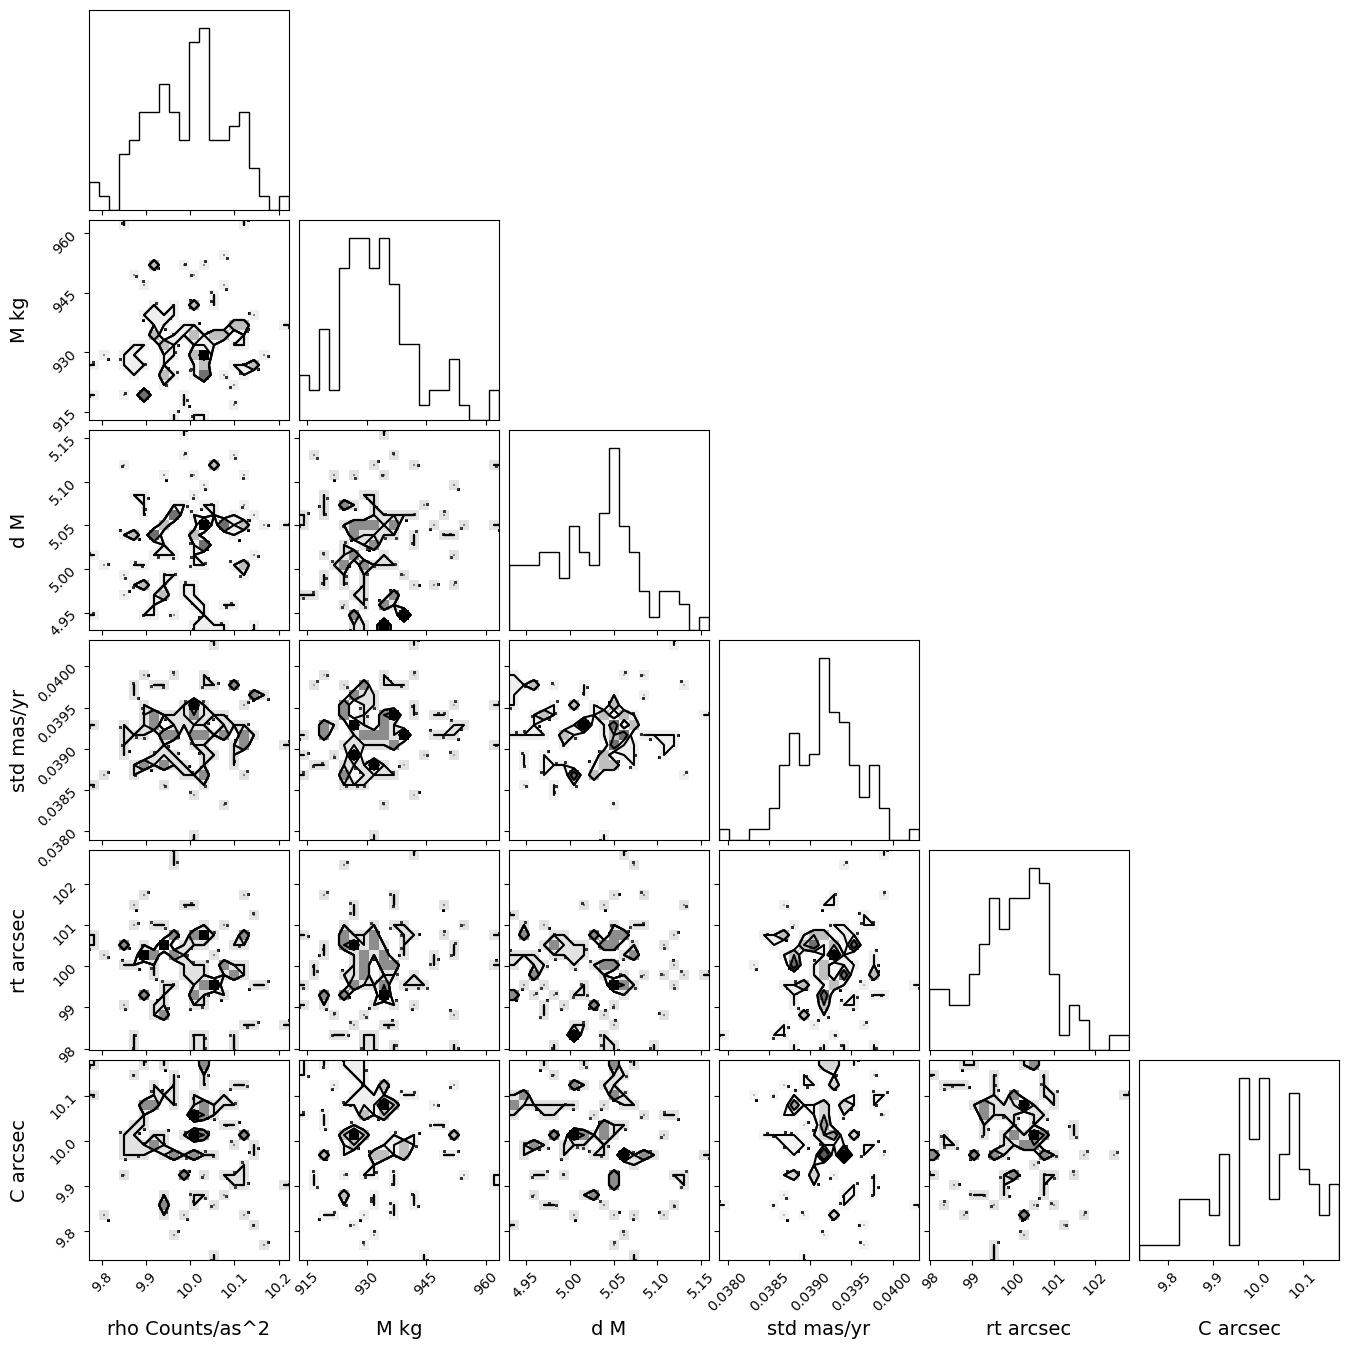

In [46]:
labels_list = ['rho Counts/as^2','M kg','d M','std mas/yr','rt arcsec','C arcsec']
#new_params.add_many(('rho',10),('M',80),('d',10),('std',10),('rt',130),('C',150)) 
flat_samples = sampler.get_chain(discard=500, thin=1, flat=True) 
#help(corner.corner)
my_truths = np.linspace(1,6,num=6) # has to be a vector
fig = corner.corner(flat_samples, labels=labels_list, label_kwargs={"fontsize": 14},truths=my_truths)
plt.savefig('ep12_corner_plexpcut_1000cts.png')
plt.show()

In [47]:
tau = sampler.get_autocorr_time(quiet=False)  # include parameter quiet=False if the function fails due to 
tau #huge error

/home/karan/.local/lib/python3.10/site-packages/emcee/autocorr.py:38: RuntimeWarning: invalid value encountered in divide
  acf /= acf[0]


array([nan, nan, nan, nan, nan, nan])

# Solving for Mass using $r_{c}$
$$r_{c} = \frac{2GM}{4.8\cdot10^{-2} \cdot<\sigma^2>\cdot d}$$ 
My $4.8\cdot10^{-2} $ is what converts mas and mas/yr to SI units <br>
My emcee simulation isn't right it's only returning my guesses and the contours are all over the place. So i will calculate the mass conversion with my guesses $r_c = 86.116 $arcseconds from MLE fit for Gaia_1, d = 5.02Kpc = $1.55 \cdot 10^{22} m$ $\sigma^2_{pm} = 0.039 mas/yr$
$$M = \frac{<\sigma^2>d \cdot 4.89\cdot 10^{-2}\cdot r_c\cdot 931}{2G}$$
$$M = 2.1 \cdot 10^{32} kg \simeq 100 M_{\odot} $$
To 2 s.f. Thats way too small